<a href="https://colab.research.google.com/github/jasxn808/Basic-Python-Analysis-NFL-Stats/blob/main/2022_JustinFields_ExplosiveRunRate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install nfl_data_py

In [2]:
#2022 Justin Fields Explosive Run Rate by offense_personnel
#explosive run = any run > 10 yards gained

import pandas as pd
import nfl_data_py as nfl
from matplotlib import pyplot as plt

pd.set_option('display.max_columns', None)
df = nfl.import_pbp_data([2022])

2022 done.
Downcasting floats.


In [3]:
#list(df.columns)
##columns needed:
#rushing_yards, play_type == run, rusher_player_name, offense_personnel

In [4]:
all_runs = df.query('rusher_player_name == "J.Fields"')
all_runs = all_runs.loc[:, ['rusher_player_name', 'rushing_yards', 'offense_personnel']]

qual_runs = df.query('rusher_player_name == "J.Fields" & rushing_yards >= 10')
qual_runs = qual_runs.loc[:, ['rusher_player_name', 'rushing_yards', 'offense_personnel']]

In [5]:
total_min = all_runs['rushing_yards'].min()
qual_runs_min = qual_runs['rushing_yards'].min()

In [6]:
 all_runs_grp = all_runs.groupby(['offense_personnel'])
 qual_runs_grp = qual_runs.groupby(['offense_personnel'])

In [7]:
#count of all J Fields rush attempts, grouped by offense_personnel
sum_attempts = all_runs_grp['rushing_yards'].apply(lambda x: (x >= total_min).sum())
#count of all J Fields explosive runs, grouped by offense_personnel
expl_runs = qual_runs_grp['rushing_yards'].apply(lambda x: (x >= qual_runs_min).sum())

In [8]:
rushing_df = pd.concat([sum_attempts, expl_runs], axis='columns')

rushing_df.columns = ['total_attempts', 'expl_runs']

rushing_df = rushing_df.fillna(0)



In [9]:
rushing_df['expl_rate'] = (rushing_df['expl_runs'] / rushing_df['total_attempts']) * 100
rushing_df.sort_values('expl_rate', ascending=False, inplace=True)

<ipython-input-39-efcddaaa67e6>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<BarContainer object of 7 artists>

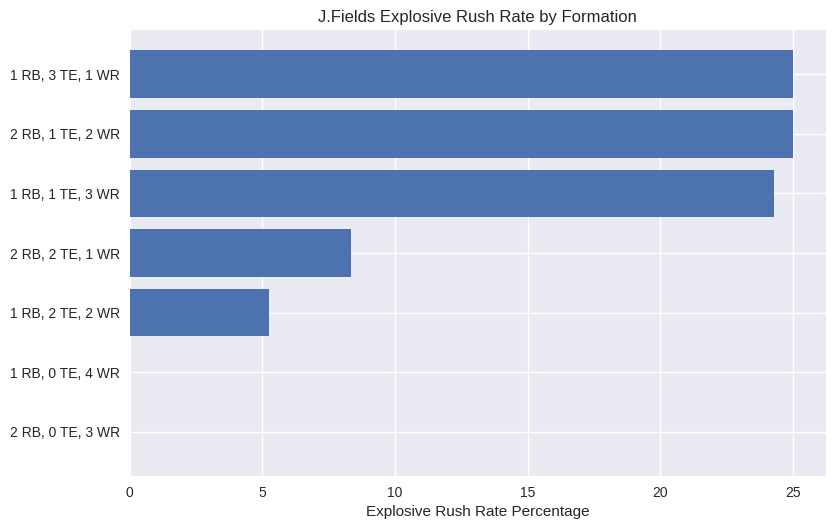

In [39]:
plt.style.use('seaborn')

rushing_fig = \
rushing_df.reset_index()

rushing_fig = rushing_fig.iloc[::-1]

x_ax = rushing_fig['offense_personnel']
y_ax = rushing_fig['expl_rate']

plt.title('J.Fields Explosive Rush Rate by Formation')
plt.xlabel('Explosive Rush Rate Percentage')

plt.barh(x_ax, y_ax)
